# Imports

In [1]:
import pandas   as pd
import numpy    as np

from sklearn    import metrics  as mt
from sklearn    import tree     as tr
from matplotlib import pyplot   as plt

# Load Dataset

In [2]:
#Lendo arquivo CSV de Treino
x_train = pd.read_csv('../../dataset/reg/X_training.csv')
y_train = pd.read_csv('../../dataset/reg/y_training.csv')

#Lendo arquivo CSV de teste
x_test = pd.read_csv('../../dataset/reg/X_test.csv')
y_test = pd.read_csv('../../dataset/reg/y_test.csv')

#Lendo arquivo CSV de Validação
x_val = pd.read_csv('../../dataset/reg/X_validation.csv')
y_val = pd.read_csv('../../dataset/reg/y_val.csv')

In [3]:
x_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.092100,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.737000,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.274000,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561
3,-0.580967,0.002340,0.704,0.529,0.874000,1.000000,0.370,-0.266382,0,0.0416,0.666173,0.8,0.507
4,-0.688566,0.000414,0.354,0.910,0.205000,0.090909,0.456,0.422914,1,0.0430,1.182630,0.8,0.362


In [4]:
#Preparação dos dados

y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

# Model Training - DecisionTree Regressor (Training Data)

In [5]:
max_depth_values = np.arange(2,50,1)
rmse_list = []

for i in max_depth_values:
    #define
    model = tr.DecisionTreeRegressor(random_state=0,max_depth=i)

    #fit
    model.fit(x_train,y_train)
    yhat_train = model.predict(x_train)

    #performance
    mse = mt.mean_squared_error(y_train,yhat_train)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

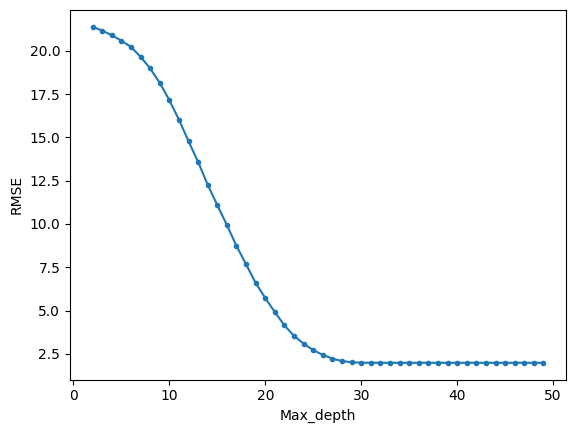

In [6]:
plt.plot(max_depth_values,rmse_list,marker='.');
plt.xlabel('Max_depth');
plt.ylabel('RMSE');

In [7]:
#Achando melhor valor de max_depth
best_depth = rmse_list.index( min( rmse_list ) )
best_depth

30

In [8]:
#define
model = tr.DecisionTreeRegressor(random_state=0,max_depth=best_depth)

#fit
model.fit(x_train,y_train)
yhat_train = model.predict(x_train)

#performance
r2_train = mt.r2_score(y_train,yhat_train)
print(f'R2 Score: {r2_train:.3f}')

mse_train = mt.mean_squared_error(y_train,yhat_train)
print(f'MSE: {mse_train:.3f}')

rmse_train = np.sqrt(mse_train)
print(f'RMSE: {rmse_train:.3f}')

mae_train = mt.mean_absolute_error(y_train,yhat_train)
print(f'MAE: {mae_train:.3f}')

mape_train = mt.mean_absolute_percentage_error(y_train,yhat_train)
print(f'MAPE: {mape_train:.2f}%')


R2 Score: 0.992
MSE: 3.969
RMSE: 1.992
MAE: 0.224
MAPE: 0.08%


# Model Training - DecisionTree Regressor (Validation Data)

In [9]:
#define
model = tr.DecisionTreeRegressor(random_state=0,max_depth=best_depth)

#fit
model.fit(x_train,y_train)
yhat_val = model.predict(x_val)

#performance
r2_val = mt.r2_score(y_val,yhat_val)
print(f'R2 Score: {r2_val:.3f}')

mse_val = mt.mean_squared_error(y_val,yhat_val)
print(f'MSE: {mse_val:.3f}')

rmse_val = np.sqrt(mse_val)
print(f'RMSE: {rmse_val:.3f}')

mae_val = mt.mean_absolute_error(y_val,yhat_val)
print(f'MAE: {mae_val:.3f}')

mape_val = mt.mean_absolute_percentage_error(y_val,yhat_val)
print(f'MAPE: {mape_val:.2f}%')

R2 Score: -0.323
MSE: 631.878
RMSE: 25.137
MAE: 17.363
MAPE: 7.17%


# Model Training - DecisionTree Regressor (Test Data)

In [10]:
#define
model = tr.DecisionTreeRegressor(random_state=0,max_depth=best_depth)

#fit
model.fit(np.concatenate((x_train,x_val)),
          np.concatenate((y_train,y_val)))

yhat_test = model.predict(x_test)

#performance
r2_test = mt.r2_score(y_test,yhat_test)
print(f'R2 Score: {r2_test:.3f}')

mse_test = mt.mean_squared_error(y_test,yhat_test)
print(f'MSE: {mse_test:.3f}')

rmse_test = np.sqrt(mse_test)
print(f'RMSE: {rmse_test:.3f}')

mae_test = mt.mean_absolute_error(y_test,yhat_test)
print(f'MAE: {mae_test:.3f}')

mape_test = mt.mean_absolute_percentage_error(y_test,yhat_test)
print(f'MAPE: {mape_test:.2f}%')

R2 Score: -0.153
MSE: 561.369
RMSE: 23.693
MAE: 15.643
MAPE: 6.24%


/home/leprado06/.pyenv/versions/ensaio_ML/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


# Save Results

In [11]:
train_metrics = {
    "Algorithm": "DecisionTree Regressor",
    "R-Squared": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "DecisionTree Regressor",
    "R-Squared": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "DecisionTree Regressor",
    "R-Squared": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False)